In [1]:
import demo_fix
import networkx as nx
import random
from dtos import q, Graph, Flow
from solutions import DynamicSolution, TargetOptimal, TargetNE, GreedySolution, RotatingGreedySolution, GeneticSolution
from common import DiscreteCore, ContinuousCore
from utils import Context
from visualization import Plotter

## Graph Generation

In [9]:
num_nodes=10
degree = 2
G = nx.barabasi_albert_graph(num_nodes,degree)
while not nx.is_planar(G) or not nx.is_connected(G):
    G = nx.barabasi_albert_graph(num_nodes,degree)

In [10]:
edges = []
ch=[0, 1, 2]
for e in G.edges:
    tmp1=random.choice(ch)
    tmp2=random.choice(ch)
    tmp3=[0,0,0]
    tmp3[tmp1]=random.choice(ch)
    tmp3[tmp2]=random.choice(ch)
    edges.append((chr(e[0]+65),chr(e[1]+65), q(*tmp3)))

4


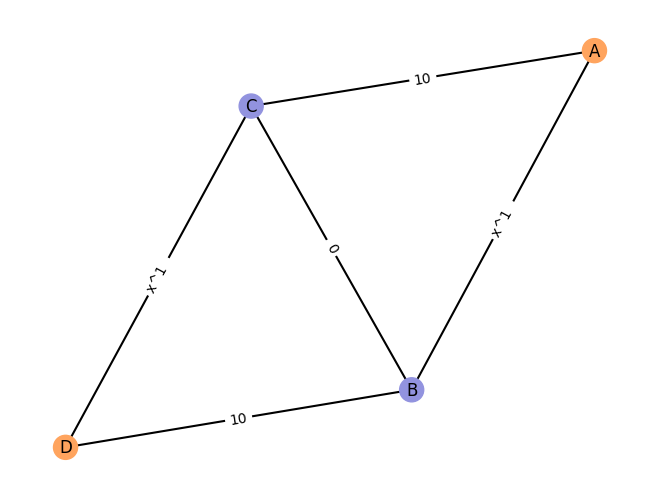

In [13]:
G = Graph('L', 'P', edges)
G = Graph('A', 'D', [
    ('A', 'B', q(0,1,0)),
    ('A', 'C', q(0,0,10)),
    ('C', 'B', q(0,0,0)),
    ('B', 'D', q(0,0,10)),
    ('C', 'D', q(0,1,0))
])
G.draw()
print(len(G.possible_paths()))

## Comparing Methods

In [14]:
methods_optimal = Context({
    "Dynamic": DynamicSolution,
    "Genetic": GeneticSolution.parametrize(num_generations=100, sol_per_pop=10)
})
methods_optimal.run_and_draw(G, ContinuousCore(10), TargetOptimal(), attach=Plotter())

Gif saved in outputs
Gif saved in outputs
Gif saved in outputs


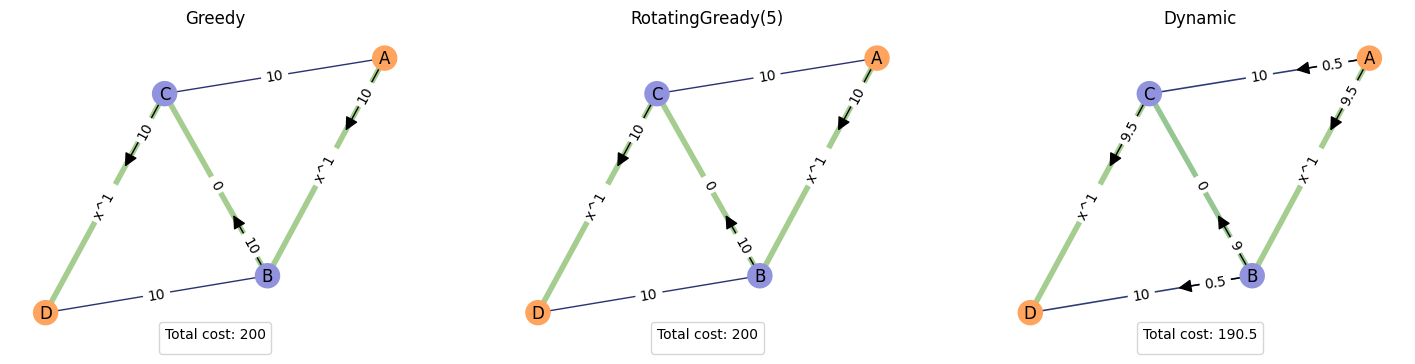

In [6]:
methods_NE = Context({
    "Greedy": GreedySolution,
    "RotatingGready(5)": RotatingGreedySolution.parametrize(rotations=5),
    "Dynamic": DynamicSolution,
})
methods_NE.run_and_draw(G, DiscreteCore(10,precision=0.5), TargetNE(), attach=Plotter())

In [7]:
import os
d="outputs"
names=["opt_greedy","opt_rotating","opt_dynamic","opt_genetic","ne_greedy","ne_rotating","ne_dynamic"]
for f,new_f in zip(os.listdir(d),names):
    os.rename(d+"/"+f,d+"/"+new_f+".gif")

In [8]:
import time
tmp = {
    "Greedy": GreedySolution,
    "RotatingGready(5)": RotatingGreedySolution.parametrize(rotations=5),
    "Dynamic": DynamicSolution,
    "Genetic": GeneticSolution.parametrize(num_generations=1000, sol_per_pop=100)
}

for k,v in tmp.items():
    s=time.time()
    v(G).solve(DiscreteCore(10,precision=0.5), target=TargetOptimal())
    print(time.time()-s)

for k,v in list(tmp.items())[:-1]:
    s=time.time()
    v(G).solve(DiscreteCore(10,precision=0.5), target=TargetNE())
    print(time.time()-s)

0.010988473892211914
0.052056312561035156
0.8788290023803711
19.03074860572815
0.004994869232177734
0.018978595733642578
0.6442623138427734
